# Crime & Economy Project (in python)

In this project I look for a relationship between economic data and crime rates. 

I obtained statistics for various industries at the county level from the BLS. I also found the number of arrests and charge for a variety of crimes at the county level. These datasets span 2010 to 2016 in two year intervals.

After cleaning the data I will test out a variety of statistical tools and methods to try and find meaningful relationships and models in the data. 

In [1]:
# Project
%run Imports.ipynb
# Imports functions from seperate notebook
%run Functions.ipynb

C:\Users\Matt\Downloads\Project


Here I load in the data and spit out some summary statistics on the structure of the data.

In [2]:
# Reading in Data
start_time = timeit.default_timer()
# Keys to extract formatted State and County names
key = pd.read_excel('fips_codes_website.xls')   # Counties and major cities
key00 = pd.read_csv('FIPS_countycodes.txt',delimiter=',')  # Counties only
key00['GU Name'] = key00['GU Name'].str[:-7]  # Slice 'county' from names
# Crime
crime2010 = pd.read_csv('33523-0001-crimedata2010.txt',delimiter='\t')
crime2012 = pd.read_csv('35019-0001-crimedata2012.txt',delimiter='\t')
crime2014 = pd.read_csv('36399-0001-crimedata2014.txt',delimiter='\t')
crime2016 = pd.read_csv('37059-0001-crimedata2016.txt',delimiter='\t')
# Enumployment & Wages
#test_wages_18 = pd.read_excel('allhlcn183.xlsx',sheet_name='US_St_Cn_MSA')
wage_unemp2018 = pd.read_csv('allhlcn183wage_unemp2018.txt',delimiter='\t',dtype={'St':str})
wage_unemp2016 = pd.read_csv('allhlcn163wage_unemp2016.txt',delimiter='\t',dtype={'St':str})
wage_unemp2014 = pd.read_csv('allhlcn143wage_unemp2014.txt',delimiter='\t',dtype={'St':str})
wage_unemp2012 = pd.read_csv('allhlcn123wage_unemp2012.txt',delimiter='\t',dtype={'St':str})
wage_unemp2010 = pd.read_csv('allhlcn103wage_unemp2010.txt',delimiter='\t',dtype={'St':str})

print("2014 crime:",crime2014.shape,"// key:",key.shape)
print('2018 Wages:',wage_unemp2018.shape)
x = ((crime2014.shape[0])*(crime2014.shape[1]))*4 + ((wage_unemp2018.shape[0])*(wage_unemp2018.shape[1]))*5 + (key00.shape[0])*key00.shape[1]
print(x,'unique datapoints in all datasets')
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

2014 crime: (3177, 56) // key: (41787, 7)
2018 Wages: (62724, 21)
7313843 unique datapoints in all datasets
9.216 run time


In [28]:
# Data Cleaning #
pd.options.mode.chained_assignment = None # Turn off copy with setting warning
start_time = timeit.default_timer()
# Yearly cleaned databases
crime10 = crime_cleaner(crime2010)
crime12 = crime_cleaner(crime2012)
crime14 = crime_cleaner(crime2014)
crime16 = crime_cleaner(crime2016)
cols = list(crime14.columns.values) # Grab columns
# Cleaned Wage Data
economic10 = wage_cleaner(wage_unemp2010) # Returns county level data sets
economic12 = wage_cleaner(wage_unemp2012)
economic14 = wage_cleaner(wage_unemp2014)
economic16 = wage_cleaner(wage_unemp2016)
economic18 = wage_cleaner(wage_unemp2018)
economic18['Industry'] = economic18['Industry'].str[1:] # Remove first space in 2018 industry codes

# Combined crime and economic dataframes and rearrange columns
db2010 = crime10.merge(economic10,left_on=['State Abbreviation','GU Name'],right_on=['State Abbreviation','GU Name'])
cols = db2010.columns.tolist()  # Code to rearrange columns
cols = ['Year']+cols[:-14]+cols[-10:]
db2010 = db2010[cols]
db2012 = crime12.merge(economic12,left_on=['State Abbreviation','GU Name'],right_on=['State Abbreviation','GU Name'])
db2012 = db2012[cols]
db2014 = crime14.merge(economic14,left_on=['State Abbreviation','GU Name'],right_on=['State Abbreviation','GU Name'])
db2014 = db2014[cols]
db2016 = crime16.merge(economic16,left_on=['State Abbreviation','GU Name'],right_on=['State Abbreviation','GU Name'])
db2016 = db2016[cols]
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

6.396 run time


Here I generate a sample dataset of randomly selected counties and all associated data. 

It is worth noting that this can be computationally expensive and that cell run times take about 0.1 seconds per county in the sample. 

(e.g. a sample of 400 counties will take ~40 seconds to generate in the cell below)

In [4]:
# Selects X Random counties and stores them as a dictionary by count // Key = MI, County
start_time = timeit.default_timer()
samp_db = {}
for n in range(100):
    r = random.randint(0,len(crime12))
    x = crime12['State Abbreviation'].iloc[r] # Pull State Abreviation
    y = crime12['GU Name'].iloc[r]  # Pull analogous county name
    z = x+', '+y # Format name for dictionary key
    agg = test_search(y,x) # Return criminal and economic data
    samp_db[z] = agg  # Add data to empty dictionary
keys = list(samp_db.keys())
print(len(samp_db))
print(samp_db.keys())
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

98
dict_keys(['NM, Chaves', 'OR, Jackson', 'MI, Otsego', 'VA, Washington', 'IN, Steuben', 'IL, Stark', 'KY, Bracken', 'GA, Paulding', 'PA, Erie', 'TX, Sterling', 'GA, Dawson', 'ND, Bowman', 'NV, Mineral', 'CO, Eagle', 'CO, Clear Creek', 'FL, Hendry', 'OH, Crawford', 'NJ, Hunterdon', 'TX, Lampasas', 'TX, Bell', 'AL, Monroe', 'TX, Ellis', 'VA, Buena Vis', 'MO, Daviess', 'TN, Robertson', 'MT, Sweet Grass', 'IA, Audubon', 'NY, Westchester', 'KY, Nicholas', 'ND, Mercer', 'OK, Ellis', 'IA, Iowa', 'NC, Avery', 'IL, Fayette', 'PA, Centre', 'NC, Perquimans', 'OK, Harper', 'IL, Morgan', 'PA, Cameron', 'MN, Beltrami', 'OH, Lake', 'MN, Kittson', 'OH, Putnam', 'SC, Saluda', 'IL, Kendall', 'VA, Shenandoah', 'LA, Calcasieu', 'AR, Lawrence', 'MO, Nodaway', 'MO, Cass', 'WV, Mingo', 'LA, Union', 'WI, Marquette', 'CA, Calaveras', 'NE, Hooker', 'WV, Kanawha', 'SC, Sumter', 'IA, Taylor', 'CO, San Juan', 'MO, Mississippi', 'CA, San Joaquin', 'LA, Morehouse', 'WV, Clay', 'NC, Chatham', 'IL, Randolph', 'NE, N

In [5]:
# Select 5 biggest industries in sample
start_time = timeit.default_timer()
industry = big_industry_bot(samp_db)
print('5 Largest Industries in sample:\n',industry)
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

5 Largest Industries in sample:
 ['Goods-producing', 'Construction', 'Service-providing', 'Trade, transportation, and utilities', 'Financial activities']
0.044 run time


In [6]:
start_time = timeit.default_timer()
# Initialize sample to new variable for trouble shooting // preserve OG sample data
bedrock = samp_db

# start base data frame -- create new dataframe, still need to account for various industries
new_world = pd.DataFrame()

for a in keys:
    for b in industry[:]:
        x = bedrock[a].loc[bedrock[a]['Industry'] == b] #
        new_world = new_world.append(x)
        
new_world = new_world.reset_index()  # reset index
new_world = new_world.drop('index',axis=1)  # drop index column
cols = new_world.columns.tolist() # rearrange columns
cols = cols[:3]+cols[-9:]+cols[3:48]
new_world = new_world[cols]

elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')
new_world.head(10)

3.726 run time


,Year,State Abbreviation,GU Name,Industry,Establishment Count,July Employment,August Employment,September Employment,Total Quarterly Wages,Average Weekly Wage,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,2010,NM,Chaves,Goods-producing,337,"3,551","3,551",3612,"31,283,048",674,...,32,291,406,0,434,32,2267,2,0,0
1,2012,NM,Chaves,Goods-producing,325,"3,708","3,718",3666,"34,056,467",709,...,19,261,315,0,429,0,1773,3,0,0
2,2014,NM,Chaves,Goods-producing,311,"3,733","3,701",3644,"35,583,831",741,...,28,192,154,0,256,0,4548,0,0,0
3,2016,NM,Chaves,Goods-producing,312,"3,575","3,549",3527,"35,902,325",778,...,26,233,96,0,239,0,5405,0,0,0
4,2010,NM,Chaves,Construction,159,901,901,917,"8,081,960",686,...,32,291,406,0,434,32,2267,2,0,0
5,2012,NM,Chaves,Construction,148,933,944,929,"8,589,641",706,...,19,261,315,0,429,0,1773,3,0,0
6,2014,NM,Chaves,Construction,133,884,877,858,"7,561,423",666,...,28,192,154,0,256,0,4548,0,0,0
7,2016,NM,Chaves,Construction,126,835,848,837,"7,849,217",719,...,26,233,96,0,239,0,5405,0,0,0
8,2010,NM,Chaves,Service-providing,1257,"13,396","13,461",13366,"92,407,122",530,...,32,291,406,0,434,32,2267,2,0,0
9,2012,NM,Chaves,Service-providing,1246,"12,983","12,971",12934,"90,930,117",540,...,19,261,315,0,429,0,1773,3,0,0


Due to inconsistencies in the data it is important that we double check that there is the same number of data entries for each industry we want to observe. If we have an uneven database, we need to draw a new sample. 

In [7]:
start_time = timeit.default_timer()
crimes = cols[12:]
# Create a list of all industry data entrys
l1 = []
for a in new_world['Industry']:
    l1.append(a)
print('Count of target industries in sample \n\n MUST ALL BE SAME\n')
# Find count of each indutry in sample
l2 = []
for a in industry:
    #print(a,'//',l1.count(a)) # Print out count of each industry in data frame
    l2.append(l1.count(a))

c = l2[0]
for a in l2[1:]:
    if a == c:
        print('Check')
    else:
        print('Failed Industry Count Check')

elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

Count of target industries in sample 

 MUST ALL BE SAME

Check
Check
Check
Check
0.003 run time


In [8]:
start_time = timeit.default_timer()
# Create final data frame that accounts for metrics across industries
samp_dic = {}
stat = ['Establishment Count','Average Weekly Wage','August Employment']

for s in stat:
    for n in industry:
        samp_dic[n+' '+s] = test_func(new_world,keys,s,n)

for a in crimes:
    samp_dic[a] = test_funk(bedrock,a)
    
finaldb = pd.DataFrame(data=samp_dic)

print(samp_dic.keys(),'\n\n')
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')
finaldb.head(10)

dict_keys(['Goods-producing Establishment Count', 'Construction Establishment Count', 'Service-providing Establishment Count', 'Trade, transportation, and utilities Establishment Count', 'Financial activities Establishment Count', 'Goods-producing Average Weekly Wage', 'Construction Average Weekly Wage', 'Service-providing Average Weekly Wage', 'Trade, transportation, and utilities Average Weekly Wage', 'Financial activities Average Weekly Wage', 'Goods-producing August Employment', 'Construction August Employment', 'Service-providing August Employment', 'Trade, transportation, and utilities August Employment', 'Financial activities August Employment', 'MURDER', 'P1TOT', 'P1VLNT', 'P1PRPTY', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP', 'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE', 'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS', 'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BO

,Goods-producing Establishment Count,Construction Establishment Count,Service-providing Establishment Count,"Trade, transportation, and utilities Establishment Count",Financial activities Establishment Count,Goods-producing Average Weekly Wage,Construction Average Weekly Wage,Service-providing Average Weekly Wage,"Trade, transportation, and utilities Average Weekly Wage",Financial activities Average Weekly Wage,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,337,159,1257,355,169,674,686,530,551,637,...,32,291,406,0,434,32,2267,2,0,0
1,325,148,1246,350,168,709,706,540,559,697,...,19,261,315,0,429,0,1773,3,0,0
2,311,133,1285,357,168,741,666,571,583,693,...,28,192,154,0,256,0,4548,0,0,0
3,312,126,1338,351,160,778,719,576,610,722,...,26,233,96,0,239,0,5405,0,0,0
4,1095,633,5050,1238,616,711,761,610,586,738,...,50,996,929,0,924,5,1975,0,146,6
5,1105,626,5242,1295,613,726,787,657,624,847,...,57,1090,801,0,898,11,2298,0,69,4
6,1131,643,5397,1307,612,799,835,685,643,899,...,39,980,526,0,624,0,2852,0,50,4
7,1231,716,5657,1292,641,865,890,744,695,1009,...,28,980,393,0,644,1,3688,0,9,2
8,165,93,551,174,58,751,652,539,533,813,...,1,74,30,3,12,0,196,0,0,6
9,147,81,525,166,60,813,688,545,535,739,...,6,106,42,6,16,0,139,0,0,5


In [9]:
# Check to ensure that data frame is made of only int64 values
start_time = timeit.default_timer()
x = finaldb.dtypes
x = pd.DataFrame(data=x)
x = x.transpose()
# Create list of column names that are not int64
target = []
for a in x:
    if x[a][0] == 'object':
        b = str(x[a])[:-15]
        b = b[18:]
        target.append(b)
# Convert string columns to interger columns
for a in target:
        finaldb[a] = finaldb[a].str.replace(',','')
        finaldb[a] = finaldb[a].astype(int)
        #print(finaldb[a])
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

0.03 run time


# Statistical Analysis

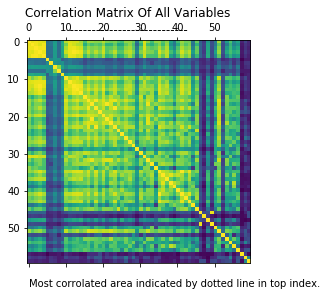


10 HIGHEST total correlations:


,"Trade, transportation, and utilities August Employment",P1TOT,P1PRPTY,Service-providing August Employment,DRUGTOT,ROBBERY,"Trade, transportation, and utilities Establishment Count",Goods-producing August Employment,LARCENY,DRGPOSS
0,43.260239,43.153015,42.646961,42.34685,42.258802,42.213146,42.192854,41.976406,41.904413,41.762974


In [27]:
corrdb = finaldb.corr().abs().sum()
corrdbl = pd.DataFrame(data=corrdb).nlargest(10,0).transpose()  # Largest correlations
corrdbs = pd.DataFrame(data=corrdb).nsmallest(10,0).transpose()   # Smallest correlations
# Creates a correlation matrix of all variables
plt.matshow(finaldb.corr())
plt.suptitle('Correlation Matrix Of All Variables\n')
plt.title('           ---------------------------',loc='left')
plt.annotate('Most corrolated area indicated by dotted line in top index.\n',(0,0),(0,69))
plt.show()
cols = finaldb.columns.tolist()
print('\n10 HIGHEST total correlations:')
corrdbl

In [29]:
print('--Index of most correlated variables(highest to lowest) for reference--\n')
for i in corrdbl:
    print(i+' Index number:',finaldb.columns.get_loc(i))

--Index of most correlated variables(highest to lowest) for reference--

Trade, transportation, and utilities August Employment Index number: 13
P1TOT Index number: 16
P1PRPTY Index number: 18
Service-providing August Employment Index number: 12
DRUGTOT Index number: 35
ROBBERY Index number: 20
Trade, transportation, and utilities Establishment Count Index number: 3
Goods-producing August Employment Index number: 10
LARCENY Index number: 23
DRGPOSS Index number: 41


**REGRESSION**

In [24]:
x = finaldb[list(finaldb.columns.values[:15])]  # Select columns to use as independant vars
y = finaldb['DUI']  # Set y variable

model = sm.OLS(y, x.astype(float)).fit()
predictions = model.predict(x) # make the predictions by the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DUI   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     384.1
Date:                Thu, 23 May 2019   Prob (F-statistic):          2.40e-217
Time:                        12:37:09   Log-Likelihood:                -2520.0
No. Observations:                 391   AIC:                             5070.
Df Residuals:                     376   BIC:                             5130.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

# Regression Summary

Upon running the regression, at a cursory glance we can see that our economic data is highly corrolated with DUI arrests. However this is an abnormally large R-squared and is more likely due to flaws in the model. Further, it does not extrapolate well and the R-squared tends to vary between samples which also suggests flaws in the model. We can also see that although many of the independant variables are statisticaly significant, the coefficients are quite small and are not 'economically significant'. 

It is worth noting that although many variables are not consistently in the top 10 most corrolated variables between samples, crime totals such as P1TOT(total 'part 1' crimes) and P1PRPTY(total property crimes) are always present in the top 10. This might be interprated to suggest that crime in general is influenced by the economy, while individual crime rates are influenced by other factors not present in this particular dataset. This seems plausible but would need further data/research to confirm. 